In [2]:
import pandas as pd;
import numpy as np;
import sklearn as sk;
import xgboost as xgb;
import matplotlib as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Cargamos el dataset desde el archivo csv
df = pd.read_csv(r'C:\Users\mrodr\OneDrive\Escritorio\UAL\TFG\prestamos campos definidos\loan.csv')

C:\Users\mrodr\AppData\Local\Temp\ipykernel_23268\682258873.py:2: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\mrodr\OneDrive\Escritorio\UAL\TFG\prestamos campos definidos\loan.csv')


In [4]:
#Veamos la cabecera del dataset
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [5]:
#Veamos los valores únicos de loan_status
print(df['loan_status'].unique())
#Cuanta cantidad de valores únicos hay
print(df["loan_status"].value_counts())

['Current' 'Fully Paid' 'Late (31-120 days)' 'In Grace Period'
 'Charged Off' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64


In [6]:
#LIMPIEZA DE DATOS
#Vamos a eliminar filas vacias
#df = df.dropna()

# Definir las categorías de Good Loan y Bad Loan
good_loan_status = ["Current", "Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
bad_loan_status = ["Late (31-120 days)", "In Grace Period", "Charged Off", 
                   "Late (16-30 days)", "Default", 
                   "Does not meet the credit policy. Status:Charged Off"]

# Transformar 'loan_status' a binario
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x in good_loan_status else 0)

# Verificar la transformación
print(df['loan_status'].value_counts())
df.head()

loan_status
1    1963635
0     297033
Name: count, dtype: int64


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,1,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,1,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,1,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI

In [7]:
# Verificar los tipos de datos de cada columna
print(df.dtypes.value_counts())

#RESULTADOS
#Vemos que hay 3 tipos de datos: float64, int64 y object
#Vamos a ver cuantos valores únicos hay en cada columna de tipo object

#NUMERICAS  110
#FLOAT      105
#INT        5

#OBJECT     35

float64    105
object      35
int64        5
Name: count, dtype: int64


In [8]:
#Una vez ya sabemos los tipo de datos que tenmos vamos a ver la correalción de las variables con loan_status
#Separamos las variables numéricas y las categóricas
variableNumerica = df.select_dtypes(include=['int64', 'float64']).columns
variableCategorica = df.select_dtypes(include=['object']).columns

In [9]:
#Calculamos la correlación de las variables numéricas con loan_status
correlation_matrix = df[variableNumerica].corr()

# Extraer la correlación de cada variable con 'loan_status'
correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)

In [10]:
#Mostramos las correlaciones
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(correlation_with_target.sort_values(ascending=False))

loan_status                                   1.000000
total_rec_prncp                               0.223022
last_pymnt_amnt                               0.187750
out_prncp                                     0.162198
out_prncp_inv                                 0.162182
total_pymnt_inv                               0.137199
total_pymnt                                   0.137170
bc_open_to_buy                                0.082975
total_bc_limit                                0.075750
sec_app_mths_since_last_major_derog           0.072526
tot_hi_cred_lim                               0.062747
mths_since_recent_inq                         0.061419
total_rev_hi_lim                              0.057065
avg_cur_bal                                   0.057003
mo_sin_rcnt_tl                                0.055322
mo_sin_rcnt_rev_tl_op                         0.054432
tot_cur_bal                                   0.052712
sec_app_mort_acc                              0.051780
settlement

In [11]:
#Calculamos la correlación de las variables categóricas con loan_status
from scipy.stats import chi2_contingency
import numpy as np

# Función para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular Cramér's V para cada variable categórica
cramer_results = {}
for var in variableCategorica:
    cramer_results[var] = cramers_v(df[var], df['loan_status'])

print('hecho')

C:\Users\mrodr\AppData\Local\Temp\ipykernel_23268\3811236791.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


hecho


In [12]:
# Mostrar las correlaciones ordenadas
print(pd.Series(cramer_results).sort_values(ascending=False))

hardship_status              0.478854
last_credit_pull_d           0.398188
hardship_start_date          0.351415
payment_plan_start_date      0.347165
hardship_end_date            0.346425
hardship_reason              0.327185
debt_settlement_flag         0.312886
last_pymnt_d                 0.309678
hardship_loan_status         0.276995
sub_grade                    0.234587
grade                        0.230237
emp_title                    0.181675
issue_d                      0.173060
verification_status          0.095602
next_pymnt_d                 0.091796
term                         0.091056
title                        0.086877
initial_list_status          0.060551
disbursement_method          0.058471
home_ownership               0.052392
purpose                      0.050961
hardship_flag                0.050183
zip_code                     0.049814
pymnt_plan                   0.044321
addr_state                   0.038434
application_type             0.037494
earliest_cr_

In [13]:
#CLASIFICAMOS LAS VARIABLES

# Definir umbrales
umbral_fuerte = 0.2
umbral_moderado = 0.1

# Inicializar listas para cada categoría NUMERICAS
variables_fuertes_numericas = []
variables_moderadas_numericas = []
variables_sin_relacion_numericas = []

# Clasificar variables numéricas
for variable, correlacion in correlation_with_target.items():
    if pd.isna(correlacion):  # Si es NaN
        variables_sin_relacion_numericas.append(variable)
    elif abs(correlacion) > umbral_fuerte:  # Correlación fuerte
        variables_fuertes_numericas.append(variable)
    elif umbral_moderado < abs(correlacion) <= umbral_fuerte:  # Correlación moderada
        variables_moderadas_numericas.append(variable)
    else:  # Correlación débil o sin relación
        variables_sin_relacion_numericas.append(variable)

# Inicializar listas para cada categoría CATEGORICAS
variables_fuertes_categoricas = []
variables_moderadas_categoricas = []
variables_sin_relacion_categoricas = []

# Clasificar variables categóricas
for variable, cramer_v in cramer_results.items():
    if pd.isna(cramer_v):  # Si es NaN
        variables_sin_relacion_categoricas.append(variable)
    elif cramer_v > umbral_fuerte:  # Correlación fuerte
        variables_fuertes_categoricas.append(variable)
    elif umbral_moderado < cramer_v <= umbral_fuerte:  # Correlación moderada
        variables_moderadas_categoricas.append(variable)
    else:  # Correlación débil o sin relación
        variables_sin_relacion_categoricas.append(variable)

In [14]:
#df[variables_fuertes_categoricas] = df[variables_fuertes_categoricas].astype('category')

# Unir las variables fuertes numéricas y categóricas
variables_fuertes_totales = variables_fuertes_numericas + variables_fuertes_categoricas

# Unir las variables moderadas numéricas y categóricas
variables_moderadas_totales = variables_moderadas_numericas + variables_moderadas_categoricas

# Unir las variables sin relación numéricas y categóricas
variables_sin_relacion_totales = variables_sin_relacion_numericas + variables_sin_relacion_categoricas


#Fuertes Categoricas
print("Variables fuertes categóricas:", variables_fuertes_categoricas, len(variables_fuertes_categoricas))
#Fuertes Numericas
print("Variables fuertes numéricas:", variables_fuertes_numericas, len(variables_fuertes_numericas))

# Mostrar los resultados
print("Variables fuertes totales:", variables_fuertes_totales)
print("Variables moderadas totales:", variables_moderadas_totales)
print("Variables sin relación totales:", variables_sin_relacion_totales)

Variables fuertes categóricas: ['grade', 'sub_grade', 'last_pymnt_d', 'last_credit_pull_d', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'debt_settlement_flag'] 11
Variables fuertes numéricas: ['loan_status', 'total_rec_prncp', 'int_rate', 'hardship_dpd', 'collection_recovery_fee', 'recoveries'] 6
Variables fuertes totales: ['loan_status', 'total_rec_prncp', 'int_rate', 'hardship_dpd', 'collection_recovery_fee', 'recoveries', 'grade', 'sub_grade', 'last_pymnt_d', 'last_credit_pull_d', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'debt_settlement_flag']
Variables moderadas totales: ['last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_rec_late_fee', 'emp_title', 'issue_d']
Variables sin relación totales: ['bc_open_to_buy', 'total_bc_limit', 'sec_app_mths_since_last_major_derog'

In [15]:
# Contar el número de variables en cada categoría
num_variables_fuertes = len(variables_fuertes_totales)
num_variables_moderadas = len(variables_moderadas_totales)
num_variables_sin_relacion = len(variables_sin_relacion_totales)

# Mostrar los resultados
print(f"Número de variables con correlación fuerte: {num_variables_fuertes}")
print(f"Número de variables con correlación moderada: {num_variables_moderadas}")
print(f"Número de variables sin relación: {num_variables_sin_relacion}")

print("\nTotal de variables:", num_variables_fuertes + num_variables_moderadas + num_variables_sin_relacion)
print("Total de variables utiles:", num_variables_fuertes + num_variables_moderadas)

Número de variables con correlación fuerte: 17
Número de variables con correlación moderada: 8
Número de variables sin relación: 120

Total de variables: 145
Total de variables utiles: 25


In [16]:
# Mostrar los resultados
print("Variables con correlación fuerte (|correlación| > 0.2 o Cramér's V > 0.2):")
print(variables_fuertes_totales)

print("\nVariables con correlación moderada (0.1 < |correlación| <= 0.2 o 0.1 < Cramér's V <= 0.2):")
print(variables_moderadas_totales)

print("\nVariables sin relación (|correlación| <= 0.1, Cramér's V <= 0.1 o NaN):")
print(variables_sin_relacion_totales)

Variables con correlación fuerte (|correlación| > 0.2 o Cramér's V > 0.2):
['loan_status', 'total_rec_prncp', 'int_rate', 'hardship_dpd', 'collection_recovery_fee', 'recoveries', 'grade', 'sub_grade', 'last_pymnt_d', 'last_credit_pull_d', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'debt_settlement_flag']

Variables con correlación moderada (0.1 < |correlación| <= 0.2 o 0.1 < Cramér's V <= 0.2):
['last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_rec_late_fee', 'emp_title', 'issue_d']

Variables sin relación (|correlación| <= 0.1, Cramér's V <= 0.1 o NaN):
['bc_open_to_buy', 'total_bc_limit', 'sec_app_mths_since_last_major_derog', 'tot_hi_cred_lim', 'mths_since_recent_inq', 'total_rev_hi_lim', 'avg_cur_bal', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'tot_cur_bal', 'sec_app_mort_acc', 'settlement_percentage', 'annual_inc_joint', 'mths_since_recent_bc', 'mort_a

In [17]:
#Manejar multicolinealidad

# Calcular la matriz de correlación entre las variables fuertes
correlation_matrix_fuertes = df[variables_fuertes_numericas].corr()

# Definir un umbral para la correlación alta
umbral_correlacion = 0.7

# Identificar pares de variables con correlación alta
variables_a_descartar = set()  # Conjunto para almacenar variables a descartar
for i in range(len(correlation_matrix_fuertes.columns)):
    for j in range(i):
        if abs(correlation_matrix_fuertes.iloc[i, j]) > umbral_correlacion:
            colname_i = correlation_matrix_fuertes.columns[i]
            colname_j = correlation_matrix_fuertes.columns[j]
            
            # Comparar la correlación con 'loan_status' y descartar la que tenga menor correlación
            if abs(correlation_with_target[colname_i]) > abs(correlation_with_target[colname_j]):
                variables_a_descartar.add(colname_j)
            else:
                variables_a_descartar.add(colname_i)

# Mostrar las variables a descartar
print("Variables a descartar debido a multicolinealidad:")
print(variables_a_descartar)

# Filtrar las variables fuertes para eliminar las redundantes
variables_fuertes_finales = [var for var in variables_fuertes_numericas if var not in variables_a_descartar]

# Mostrar las variables fuertes finales
print("\nVariables fuertes finales después de eliminar multicolinealidad:")
print(variables_fuertes_finales)

Variables a descartar debido a multicolinealidad:
{'collection_recovery_fee'}

Variables fuertes finales después de eliminar multicolinealidad:
['loan_status', 'total_rec_prncp', 'int_rate', 'hardship_dpd', 'recoveries']


In [18]:
#Seleccionar las variables finales
variables_fuertes_finales_totales = variables_fuertes_finales + variables_fuertes_categoricas
print(variables_fuertes_finales_totales)
lineaTotal= len(variables_fuertes_finales_totales)
print(lineaTotal)

['loan_status', 'total_rec_prncp', 'int_rate', 'hardship_dpd', 'recoveries', 'grade', 'sub_grade', 'last_pymnt_d', 'last_credit_pull_d', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'debt_settlement_flag']
16


In [19]:
#UTILIZAR ENABLE
# Identificar las columnas categóricas (tipo 'object')
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Convertir las columnas categóricas a tipo 'category'
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

In [20]:
#COMPROBAMOS SI SE HA CAMBIADO EL TIPO DE DATOS CATEGORICO
print(df.dtypes.value_counts())

float64     105
int64         5
category      2
category      2
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64


In [21]:
df = df[variables_fuertes_finales_totales]

In [22]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,grade,sub_grade,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag
0,1,113.98,13.56,NaN,0.0,C,C1,Feb-2019,Feb-2019,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,612.25,18.94,NaN,0.0,D,D2,Feb-2019,Feb-2019,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1,212.79,17.97,NaN,0.0,D,D1,Feb-2019,Feb-2019,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1,168.07,18.94,NaN,0.0,D,D2,Feb-2019,Feb-2019,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1,660.98,16.14,NaN,0.0,C,C4,Feb-2019,Feb-2019,NaN,NaN,NaN,NaN,NaN,NaN,N


In [23]:
#Veamos los valores únicos de loan_status
print(df['hardship_loan_status'].unique())
#Cuanta cantidad de valores únicos hay
print(df["hardship_loan_status"].value_counts())
# Contar el número de valores nulos de la varibale
num_nulls = df['hardship_loan_status'].isna().sum()
print(f"\nCantidad de valores nulos (NaN) en 'hardship_loan_status': {num_nulls}")

[NaN, 'Late (16-30 days)', 'Issued', 'Current', 'Late (31-120 days)', 'In Grace Period']
Categories (5, object): ['Current', 'In Grace Period', 'Issued', 'Late (16-30 days)', 'Late (31-120 days)']
hardship_loan_status
Late (16-30 days)     4622
In Grace Period       2806
Current               2737
Late (31-120 days)     433
Issued                  15
Name: count, dtype: int64

Cantidad de valores nulos (NaN) en 'hardship_loan_status': 2250055


In [24]:
# Mostrar el número de registros antes de eliminar filas con NaN
print(f"Número de registros antes de eliminar NaN: {len(df)}")

# Eliminar filas con valores faltantes
df = df.dropna()

# Mostrar el número de registros después de eliminar filas con NaN
print(f"Número de registros después de eliminar NaN: {len(df)}")

Número de registros antes de eliminar NaN: 2260668
Número de registros después de eliminar NaN: 10613


In [25]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,grade,sub_grade,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag
95385,0,19690.03,28.72,22.0,0.0,F,F1,Feb-2019,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N
130968,1,2035.61,6.11,0.0,0.0,A,A1,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N
132095,1,943.88,19.92,0.0,0.0,D,D3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N
148481,1,336.13,18.94,0.0,0.0,D,D2,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N
192074,1,673.15,15.02,0.0,0.0,C,C3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N


In [26]:
variableObjetivo = df['loan_status']

variablePredictivos = df.drop(columns=['loan_status'])

In [27]:
variableObjetivo.head()

95385     0
130968    1
132095    1
148481    1
192074    1
Name: loan_status, dtype: int64

In [28]:
variablePredictivos.head()

,total_rec_prncp,int_rate,hardship_dpd,recoveries,grade,sub_grade,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag
95385,19690.03,28.72,22.0,0.0,F,F1,Feb-2019,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N
130968,2035.61,6.11,0.0,0.0,A,A1,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N
132095,943.88,19.92,0.0,0.0,D,D3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N
148481,336.13,18.94,0.0,0.0,D,D2,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N
192074,673.15,15.02,0.0,0.0,C,C3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N


In [29]:
#Veamos los valores únicos de grade
print(df['grade'].unique())
#Cuanta cantidad de valores únicos hay
print(df["grade"].value_counts())

['F', 'A', 'D', 'C', 'E', 'B', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade
C    3660
B    2296
D    2293
E    1223
A     532
F     467
G     142
Name: count, dtype: int64


In [30]:
#Vamos a pasar la variable grade a numerica
grado_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade_num'] = df['grade'].map(grado_map)

In [31]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,grade,sub_grade,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,grade_num
95385,0,19690.03,28.72,22.0,0.0,F,F1,Feb-2019,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N,6
130968,1,2035.61,6.11,0.0,0.0,A,A1,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,1
132095,1,943.88,19.92,0.0,0.0,D,D3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4
148481,1,336.13,18.94,0.0,0.0,D,D2,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4
192074,1,673.15,15.02,0.0,0.0,C,C3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N,3


In [32]:
#Hemos creado la varuiable grade_num, ahora vamos a eliminar la variable grade
df = df.drop(columns=['grade'])

In [33]:
#Veamos los valores únicos de sub_grade
print(df['sub_grade'].unique())
#Cuanta cantidad de valores únicos hay
print(df["sub_grade"].value_counts())

['F1', 'A1', 'D3', 'D2', 'C3', ..., 'G2', 'G1', 'G4', 'G3', 'F5']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']
sub_grade
C4    838
C5    781
C3    711
C2    684
C1    646
B5    636
D1    571
B4    548
D2    504
D3    443
D4    429
B3    417
B2    370
D5    346
B1    325
E1    298
E2    267
E3    259
E4    213
E5    186
A5    174
A4    144
F1    140
F2     92
F3     85
A3     81
F5     76
F4     74
A1     74
A2     59
G1     30
G5     29
G2     28
G3     28
G4     27
Name: count, dtype: int64


In [34]:
# Extraer letra (grado) y número
df['subgrado_letra'] = df['sub_grade'].str[0]
df['subgrado_num'] = df['sub_grade'].str[1:].astype(int)

# Mapear la letra como hicimos antes
df['subgrado_letra_num'] = df['subgrado_letra'].map(grado_map)

# Crear una variable combinada (opcional)
df['subgrado_total'] = df['subgrado_letra_num'] * 10 + df['subgrado_num']


In [35]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,sub_grade,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_letra,subgrado_num,subgrado_letra_num,subgrado_total
95385,0,19690.03,28.72,22.0,0.0,F1,Feb-2019,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N,6,F,1,6,61
130968,1,2035.61,6.11,0.0,0.0,A1,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,1,A,1,1,11
132095,1,943.88,19.92,0.0,0.0,D3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,D,3,4,43
148481,1,336.13,18.94,0.0,0.0,D2,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,D,2,4,42
192074,1,673.15,15.02,0.0,0.0,C3,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N,3,C,3,3,33


In [36]:
#Vamos a eliminar la variable sub_grade y subgrado_letra_num
df = df.drop(columns=['sub_grade', 'subgrado_letra_num', 'subgrado_letra', 'subgrado_num'])

In [37]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_total
95385,0,19690.03,28.72,22.0,0.0,Feb-2019,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N,6,61
130968,1,2035.61,6.11,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,1,11
132095,1,943.88,19.92,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,43
148481,1,336.13,18.94,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,42
192074,1,673.15,15.02,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N,3,33


In [38]:
#Veamos los valores únicos de hardship_reasen
print(df['last_pymnt_d'].unique())
#Cuanta cantidad de valores únicos hay
print(df["last_pymnt_d"].value_counts())

['Feb-2019', 'Dec-2018', 'Jan-2019', 'Oct-2018', 'Aug-2018', ..., 'Aug-2017', 'May-2017', 'Apr-2017', 'Mar-2017', 'Jan-2017']
Length: 25
Categories (135, object): ['Apr-2008', 'Apr-2009', 'Apr-2010', 'Apr-2011', ..., 'Sep-2015', 'Sep-2016', 'Sep-2017', 'Sep-2018']
last_pymnt_d
Feb-2019    4279
Jan-2019     789
Dec-2018     407
Oct-2018     377
Nov-2018     372
Mar-2018     363
Jun-2018     361
Jul-2018     348
Jan-2018     341
Aug-2018     326
Sep-2018     302
May-2018     301
Dec-2017     299
Nov-2017     289
Apr-2018     269
Feb-2018     260
Oct-2017     243
Sep-2017     217
Aug-2017     198
Jul-2017      96
Jun-2017      78
May-2017      45
Apr-2017      38
Mar-2017      11
Jan-2017       4
Apr-2012       0
Apr-2013       0
Apr-2010       0
Apr-2009       0
Apr-2008       0
Apr-2011       0
Apr-2014       0
Aug-2016       0
Dec-2008       0
Dec-2009       0
Dec-2007       0
Aug-2011       0
Aug-2008       0
Aug-2009       0
Feb-2012       0
Feb-2011       0
Feb-2010       0
Feb-2009

In [39]:
# 1. Convertir a datetime (usando día ficticio "01")
df['last_pymnt_d_parsed'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')

# 2. Extraer año y mes como variables numéricas
df['last_pymnt_year'] = df['last_pymnt_d_parsed'].dt.year
df['last_pymnt_month'] = df['last_pymnt_d_parsed'].dt.month


In [40]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,last_pymnt_d,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_total,last_pymnt_d_parsed,last_pymnt_year,last_pymnt_month
95385,0,19690.03,28.72,22.0,0.0,Feb-2019,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N,6,61,2019-02-01,2019,2
130968,1,2035.61,6.11,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,1,11,2019-02-01,2019,2
132095,1,943.88,19.92,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,43,2019-02-01,2019,2
148481,1,336.13,18.94,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,42,2019-02-01,2019,2
192074,1,673.15,15.02,0.0,0.0,Feb-2019,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N,3,33,2019-02-01,2019,2


In [41]:
#eliminar la variable last_pymnt_d
df = df.drop(columns=['last_pymnt_d', 'last_pymnt_d_parsed'])

In [42]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,last_credit_pull_d,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_total,last_pymnt_year,last_pymnt_month
95385,0,19690.03,28.72,22.0,0.0,Feb-2019,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N,6,61,2019,2
130968,1,2035.61,6.11,0.0,0.0,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,1,11,2019,2
132095,1,943.88,19.92,0.0,0.0,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,43,2019,2
148481,1,336.13,18.94,0.0,0.0,Feb-2019,NATURAL_DISASTER,COMPLETED,Oct-2018,Dec-2018,Oct-2018,Issued,N,4,42,2019,2
192074,1,673.15,15.02,0.0,0.0,Feb-2019,NATURAL_DISASTER,COMPLETED,Nov-2018,Jan-2019,Nov-2018,Current,N,3,33,2019,2


In [43]:
#hacemos exactamente lo mismo con las variables: last_credit_pull_d, hardship_start_date, hardship_end_date, payment_plan_start_date
######################last_credit_pull_d######################
# 1. Convertir a datetime (usando día ficticio "01")
df['last_credit_pull_parsed'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

# 2. Extraer año y mes como variables numéricas
df['last_credit_pull_year'] = df['last_credit_pull_parsed'].dt.year
df['last_credit_pull_month'] = df['last_credit_pull_parsed'].dt.month

#3. Eliminar la variable original
df = df.drop(columns=['last_credit_pull_d', 'last_credit_pull_parsed'])

######################hardship_start_date######################
# 1. Convertir a datetime (usando día ficticio "01")
df['hardship_start_parsed'] = pd.to_datetime(df['hardship_start_date'], format='%b-%Y')

# 2. Extraer año y mes como variables numéricas
df['hardship_start_year'] = df['hardship_start_parsed'].dt.year
df['hardship_start_month'] = df['hardship_start_parsed'].dt.month

#3. Eliminar la variable original
df = df.drop(columns=['hardship_start_date', 'hardship_start_parsed'])

######################hardship_end_date######################
# 1. Convertir a datetime (usando día ficticio "01")
df['hardship_end_parsed'] = pd.to_datetime(df['hardship_end_date'], format='%b-%Y')

# 2. Extraer año y mes como variables numéricas
df['hardship_end_year'] = df['hardship_end_parsed'].dt.year
df['hardship_end_month'] = df['hardship_end_parsed'].dt.month

#3. Eliminar la variable original
df = df.drop(columns=['hardship_end_date', 'hardship_end_parsed'])

######################payment_plan_start_date######################
# 1. Convertir a datetime (usando día ficticio "01")
df['payment_plan_start_parsed'] = pd.to_datetime(df['payment_plan_start_date'], format='%b-%Y')

# 2. Extraer año y mes como variables numéricas
df['payment_plan_start_year'] = df['payment_plan_start_parsed'].dt.year
df['payment_plan_start_month'] = df['payment_plan_start_parsed'].dt.month

#3. Eliminar la variable original
df = df.drop(columns=['payment_plan_start_date', 'payment_plan_start_parsed'])



In [44]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,hardship_reason,hardship_status,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_total,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month,hardship_start_year,hardship_start_month,hardship_end_year,hardship_end_month,payment_plan_start_year,payment_plan_start_month
95385,0,19690.03,28.72,22.0,0.0,UNEMPLOYMENT,ACTIVE,Late (16-30 days),N,6,61,2019,2,2019,2,2019,2,2019,4,2019,2
130968,1,2035.61,6.11,0.0,0.0,NATURAL_DISASTER,COMPLETED,Issued,N,1,11,2019,2,2019,2,2018,10,2018,12,2018,10
132095,1,943.88,19.92,0.0,0.0,NATURAL_DISASTER,COMPLETED,Issued,N,4,43,2019,2,2019,2,2018,10,2018,12,2018,10
148481,1,336.13,18.94,0.0,0.0,NATURAL_DISASTER,COMPLETED,Issued,N,4,42,2019,2,2019,2,2018,10,2018,12,2018,10
192074,1,673.15,15.02,0.0,0.0,NATURAL_DISASTER,COMPLETED,Current,N,3,33,2019,2,2019,2,2018,11,2019,1,2018,11


In [45]:
#ver los valores únicos de hardship_reason
print(df['hardship_reason'].unique())
#cuanta cantidad de valores únicos hay
print(df["hardship_reason"].value_counts())

['UNEMPLOYMENT', 'NATURAL_DISASTER', 'EXCESSIVE_OBLIGATIONS', 'MEDICAL', 'INCOME_CURTAILMENT', 'DISABILITY', 'REDUCED_HOURS', 'FAMILY_DEATH', 'DIVORCE']
Categories (9, object): ['DISABILITY', 'DIVORCE', 'EXCESSIVE_OBLIGATIONS', 'FAMILY_DEATH', ..., 'MEDICAL', 'NATURAL_DISASTER', 'REDUCED_HOURS', 'UNEMPLOYMENT']
hardship_reason
NATURAL_DISASTER         2965
EXCESSIVE_OBLIGATIONS    2079
UNEMPLOYMENT             1834
INCOME_CURTAILMENT       1279
MEDICAL                  1249
REDUCED_HOURS             629
DIVORCE                   218
FAMILY_DEATH              206
DISABILITY                154
Name: count, dtype: int64


In [46]:
# Aplicar One-Hot Encoding usando pd.get_dummies
df_encoded = pd.get_dummies(df['hardship_reason'], prefix='hardship_reason')

# Convertir True/False a 1/0
df_encoded = df_encoded.astype(int)

# Concatenar las columnas originales con las nuevas
df = pd.concat([df, df_encoded], axis=1)


In [47]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,hardship_reason,hardship_status,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_total,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month,hardship_start_year,hardship_start_month,hardship_end_year,hardship_end_month,payment_plan_start_year,payment_plan_start_month,hardship_reason_DISABILITY,hardship_reason_DIVORCE,hardship_reason_EXCESSIVE_OBLIGATIONS,hardship_reason_FAMILY_DEATH,hardship_reason_INCOME_CURTAILMENT,hardship_reason_MEDICAL,hardship_reason_NATURAL_DISASTER,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT
95385,0,19690.03,28.72,22.0,0.0,UNEMPLOYMENT,ACTIVE,Late (16-30 days),N,6,61,2019,2,2019,2,2019,2,2019,4,2019,2,0,0,0,0,0,0,0,0,1
130968,1,2035.61,6.11,0.0,0.0,NATURAL_DISASTER,COMPLETED,Issued,N,1,11,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0
132095,1,943.88,19.92,0.0,0.0,NATURAL_DISASTER,COMPLETED,Issued,N,4,43,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0
148481,1,336.13,18.94,0.0,0.0,NATURAL_DISASTER,COMPLETED,Issued,N,4,42,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0
192074,1,673.15,15.02,0.0,0.0,NATURAL_DISASTER,COMPLETED,Current,N,3,33,2019,2,2019,2,2018,11,2019,1,2018,11,0,0,0,0,0,0,1,0,0


In [48]:
#eliminacmos la columna hardship_reason
df = df.drop(columns=['hardship_reason'])

In [49]:
#Veamos los valores únicos de hardship_status
print(df['hardship_status'].unique())
#Cuanta cantidad de valores únicos hay
print(df["hardship_status"].value_counts())

['ACTIVE', 'COMPLETED', 'BROKEN']
Categories (3, object): ['ACTIVE', 'BROKEN', 'COMPLETED']
hardship_status
COMPLETED    7541
BROKEN       2187
ACTIVE        885
Name: count, dtype: int64


In [50]:
# Aplicar One-Hot Encoding usando pd.get_dummies
df_encoded = pd.get_dummies(df['hardship_status'], prefix='hardship_status')

# Convertir True/False a 1/0
df_encoded = df_encoded.astype(int)

# Concatenar las columnas originales con las nuevas
df = pd.concat([df, df_encoded], axis=1)

In [51]:
#eliminacmos la columna hardship_status
df = df.drop(columns=['hardship_status'])

In [52]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,hardship_loan_status,debt_settlement_flag,grade_num,subgrado_total,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month,hardship_start_year,hardship_start_month,hardship_end_year,hardship_end_month,payment_plan_start_year,payment_plan_start_month,hardship_reason_DISABILITY,hardship_reason_DIVORCE,hardship_reason_EXCESSIVE_OBLIGATIONS,hardship_reason_FAMILY_DEATH,hardship_reason_INCOME_CURTAILMENT,hardship_reason_MEDICAL,hardship_reason_NATURAL_DISASTER,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED
95385,0,19690.03,28.72,22.0,0.0,Late (16-30 days),N,6,61,2019,2,2019,2,2019,2,2019,4,2019,2,0,0,0,0,0,0,0,0,1,1,0,0
130968,1,2035.61,6.11,0.0,0.0,Issued,N,1,11,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1
132095,1,943.88,19.92,0.0,0.0,Issued,N,4,43,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1
148481,1,336.13,18.94,0.0,0.0,Issued,N,4,42,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1
192074,1,673.15,15.02,0.0,0.0,Current,N,3,33,2019,2,2019,2,2018,11,2019,1,2018,11,0,0,0,0,0,0,1,0,0,0,0,1


In [53]:
#Veamos los valores únicos de hardship_status
print(df['hardship_loan_status'].unique())
#Cuanta cantidad de valores únicos hay
print(df["hardship_loan_status"].value_counts())

['Late (16-30 days)', 'Issued', 'Current', 'Late (31-120 days)', 'In Grace Period']
Categories (5, object): ['Current', 'In Grace Period', 'Issued', 'Late (16-30 days)', 'Late (31-120 days)']
hardship_loan_status
Late (16-30 days)     4622
In Grace Period       2806
Current               2737
Late (31-120 days)     433
Issued                  15
Name: count, dtype: int64


In [54]:
# Aplicar One-Hot Encoding usando pd.get_dummies
df_encoded = pd.get_dummies(df['hardship_loan_status'], prefix='hardship_loan_status')

# Convertir True/False a 1/0
df_encoded = df_encoded.astype(int)

# Concatenar las columnas originales con las nuevas
df = pd.concat([df, df_encoded], axis=1)

In [55]:
#eliminacmos la columna hardship_loan_status
df = df.drop(columns=['hardship_loan_status'])

In [56]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,debt_settlement_flag,grade_num,subgrado_total,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month,hardship_start_year,hardship_start_month,hardship_end_year,hardship_end_month,payment_plan_start_year,payment_plan_start_month,hardship_reason_DISABILITY,hardship_reason_DIVORCE,hardship_reason_EXCESSIVE_OBLIGATIONS,hardship_reason_FAMILY_DEATH,hardship_reason_INCOME_CURTAILMENT,hardship_reason_MEDICAL,hardship_reason_NATURAL_DISASTER,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days)
95385,0,19690.03,28.72,22.0,0.0,N,6,61,2019,2,2019,2,2019,2,2019,4,2019,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
130968,1,2035.61,6.11,0.0,0.0,N,1,11,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
132095,1,943.88,19.92,0.0,0.0,N,4,43,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
148481,1,336.13,18.94,0.0,0.0,N,4,42,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
192074,1,673.15,15.02,0.0,0.0,N,3,33,2019,2,2019,2,2018,11,2019,1,2018,11,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [57]:
#Veamos los valores unicos de debt_settlement_flag
print(df['debt_settlement_flag'].unique())
#Cuanta cantidad de valores únicos hay
print(df["debt_settlement_flag"].value_counts())  

['N', 'Y']
Categories (2, object): ['N', 'Y']
debt_settlement_flag
N    10236
Y      377
Name: count, dtype: int64


In [58]:
#Aplicamos Y a 1 y N a 0
df['debt_settlement_flag_binario'] = df['debt_settlement_flag'].apply(lambda x: 1 if x == 'Y' else 0)


In [59]:
#eliminamos la variable original
df = df.drop(columns=['debt_settlement_flag'])

In [60]:
df.head()

,loan_status,total_rec_prncp,int_rate,hardship_dpd,recoveries,grade_num,subgrado_total,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month,hardship_start_year,hardship_start_month,hardship_end_year,hardship_end_month,payment_plan_start_year,payment_plan_start_month,hardship_reason_DISABILITY,hardship_reason_DIVORCE,hardship_reason_EXCESSIVE_OBLIGATIONS,hardship_reason_FAMILY_DEATH,hardship_reason_INCOME_CURTAILMENT,hardship_reason_MEDICAL,hardship_reason_NATURAL_DISASTER,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),debt_settlement_flag_binario
95385,0,19690.03,28.72,22.0,0.0,6,61,2019,2,2019,2,2019,2,2019,4,2019,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
130968,1,2035.61,6.11,0.0,0.0,1,11,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
132095,1,943.88,19.92,0.0,0.0,4,43,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
148481,1,336.13,18.94,0.0,0.0,4,42,2019,2,2019,2,2018,10,2018,12,2018,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
192074,1,673.15,15.02,0.0,0.0,3,33,2019,2,2019,2,2018,11,2019,1,2018,11,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0


In [61]:
variableObjetivo = df['loan_status']

variablePredictivos = df.drop(columns=['loan_status'])

In [62]:
# Definir las variables predictoras (X) y la variable objetivo (y)

x = variablePredictivos
y = variableObjetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

Conjunto de entrenamiento: (8490, 34) (8490,)
Conjunto de prueba: (2123, 34) (2123,)


Coeficientes: [ 1.40972783e-05  7.77165314e-03 -9.93874110e-04 -4.15050670e-05
  1.98347966e-02 -6.24526435e-03  3.98794858e-01  1.11093250e-02
 -2.12811182e-01 -1.58118034e-02  3.13753608e-01  2.94944731e-02
 -4.27684915e-01 -3.61146013e-02  2.34567342e-02  8.64623009e-03
  3.98483791e-02  1.62922229e-02 -2.04666594e-02 -3.41338294e-02
 -3.32805501e-02 -7.87435273e-03  8.90074244e-02 -2.13765479e-02
 -2.80160870e-02 -2.83252563e-01  6.00718978e-02  2.23180666e-01
  5.86292618e-02  1.48139105e-02 -6.00573560e-02 -1.18056498e-02
 -1.58016636e-03 -1.91291238e-01]
Intercepto: -192.48592651566113

MSE: 0.13270727898257484
R²: 0.4591484366485876


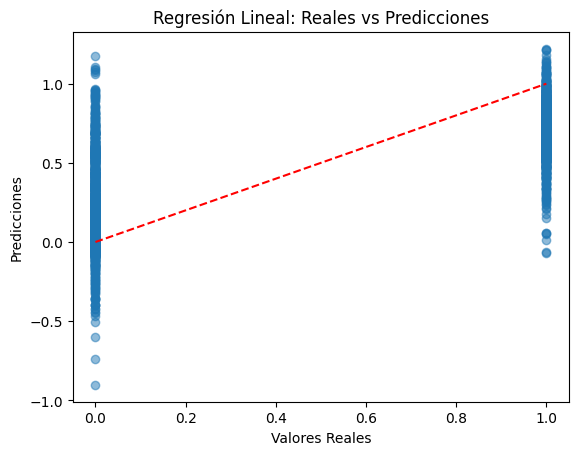

In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 3. Crear y entrenar el modelo
modelo = LinearRegression()  # No necesita hiperparámetros
modelo.fit(X_train, y_train)

# 4. Predecir y evaluar
y_pred = modelo.predict(X_test)

# Métricas clave
print("Coeficientes:", modelo.coef_)  # Pesos de cada variable
print("Intercepto:", modelo.intercept_)
print("\nMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))  # 0-1: % de varianza explicada

# 5. Gráfico de resultados (opcional)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Reales vs Predicciones")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Configurar el modelo (ajusta estos parámetros)
model_rf = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=5,       # Profundidad máxima de los árboles
    min_samples_split=10,  # Mínimo de muestras para dividir un nodo
    class_weight='balanced',  # Manejo automático de clases desbalanceadas
    random_state=42    # Semilla para reproducibilidad
)

# Entrenar el modelo
model_rf.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas de evaluación
print("\nEl porcentaje de precisión es:", model_rf.score(X_test, y_test))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba))


El porcentaje de precisión es: 0.8374941121055111

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      1206
           1       0.76      0.92      0.83       917

    accuracy                           0.84      2123
   macro avg       0.84      0.85      0.84      2123
weighted avg       0.85      0.84      0.84      2123


Matriz de Confusión:
[[935 271]
 [ 74 843]]

AUC-ROC: 0.9243332591857144


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Crear el modelo de SVM
modeloSVC = SVC(probability=True, kernel='linear')

# Entrenar el modelo
modeloSVC.fit(X_train, y_train)

# Realizar predicciones
y_pred = modeloSVC.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Crear el modelo de árbol de decisión
modeloDecisionTree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
modeloDecisionTree.fit(X_train, y_train)

# Realizar predicciones
y_pred = modeloDecisionTree.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1206
           1       0.81      0.82      0.82       917

    accuracy                           0.84      2123
   macro avg       0.84      0.84      0.84      2123
weighted avg       0.84      0.84      0.84      2123

Matriz de confusión:
[[1034  172]
 [ 162  755]]


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo de regresión logística
modeloRegresionLogistica = LogisticRegression()

# Entrenar el modelo
modeloRegresionLogistica.fit(X_train, y_train)

# Realizar predicciones
y_pred = modeloRegresionLogistica.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1206
           1       0.73      0.76      0.75       917

    accuracy                           0.78      2123
   macro avg       0.77      0.77      0.77      2123
weighted avg       0.78      0.78      0.78      2123

Matriz de confusión:
[[955 251]
 [222 695]]


c:\Users\mrodr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
